In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.api import VAR

In [101]:
url = 'https://www.fbc.keio.ac.jp/~tyabu/keiryo/oil2.csv'
df = pd.read_csv(url)
df['date'] = pd.to_datetime(df['date'], format='%b-%y')
df.set_index('date', inplace=True)
df.head()

oil    output     price
date                                     
1973-02-01  11.877260  36.06424 -47.99953
1973-03-01   1.419150  41.52702 -48.28647
1973-04-01   1.177711  43.99125 -47.08250
1973-05-01  27.455140  48.10589 -43.85765
1973-06-01 -13.110440  52.03346 -41.57106

## ラグ次数の決定

AICとBICをみる

In [ ]:
# VARモデルの適用
model = VAR(df)

# 最適なラグ次数の決定
lag_order = model.select_order(maxlags=15)
print(lag_order.summary())

/home/keisei/data-analysis/yabu-tomoyoshi-introductory-econometrics/.venv/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


 VAR Order Selection (* highlights the minimums)  
       AIC         BIC         FPE         HQIC   
--------------------------------------------------
0        19.57       19.60   3.168e+08       19.59
1        12.92       13.03   4.065e+05       12.96
2        12.65      12.86*   3.110e+05      12.73*
3       12.64*       12.93  3.072e+05*       12.75
4        12.65       13.04   3.129e+05       12.81
5        12.66       13.14   3.159e+05       12.85
6        12.69       13.26   3.253e+05       12.92
7        12.67       13.33   3.190e+05       12.93
8        12.68       13.43   3.229e+05       12.98
9        12.71       13.54   3.309e+05       13.04
10       12.74       13.66   3.419e+05       13.11
11       12.75       13.76   3.457e+05       13.15
12       12.74       13.84   3.421e+05       13.18
13       12.73       13.92   3.395e+05       13.20
14       12.74       14.02   3.424e+05       13.25
15       12.72       14.09   3.366e+05       13.26
-------------------------------

## VARモデルの推定

In [4]:
# VARモデルの推定
var_result = model.fit(maxlags=4, trend='c')

# 推定結果の要約を表示
var_result.summary()

  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Mon, 04, Nov, 2024
Time:                     16:49:09
--------------------------------------------------------------------
No. of Equations:         3.00000    BIC:                    13.1516
Nobs:                     415.000    HQIC:                   12.9227
Log likelihood:          -4377.98    FPE:                    352598.
AIC:                      12.7730    Det(Omega_mle):         321435.
--------------------------------------------------------------------
Results for equation oil
               coefficient       std. error           t-stat            prob
----------------------------------------------------------------------------
const             1.073278         1.004889            1.068           0.285
L1.oil           -0.131510         0.049683           -2.647           0.008
L1.output         0.308203         0.224197            1.375           0.169
L

## インパルス応答関数

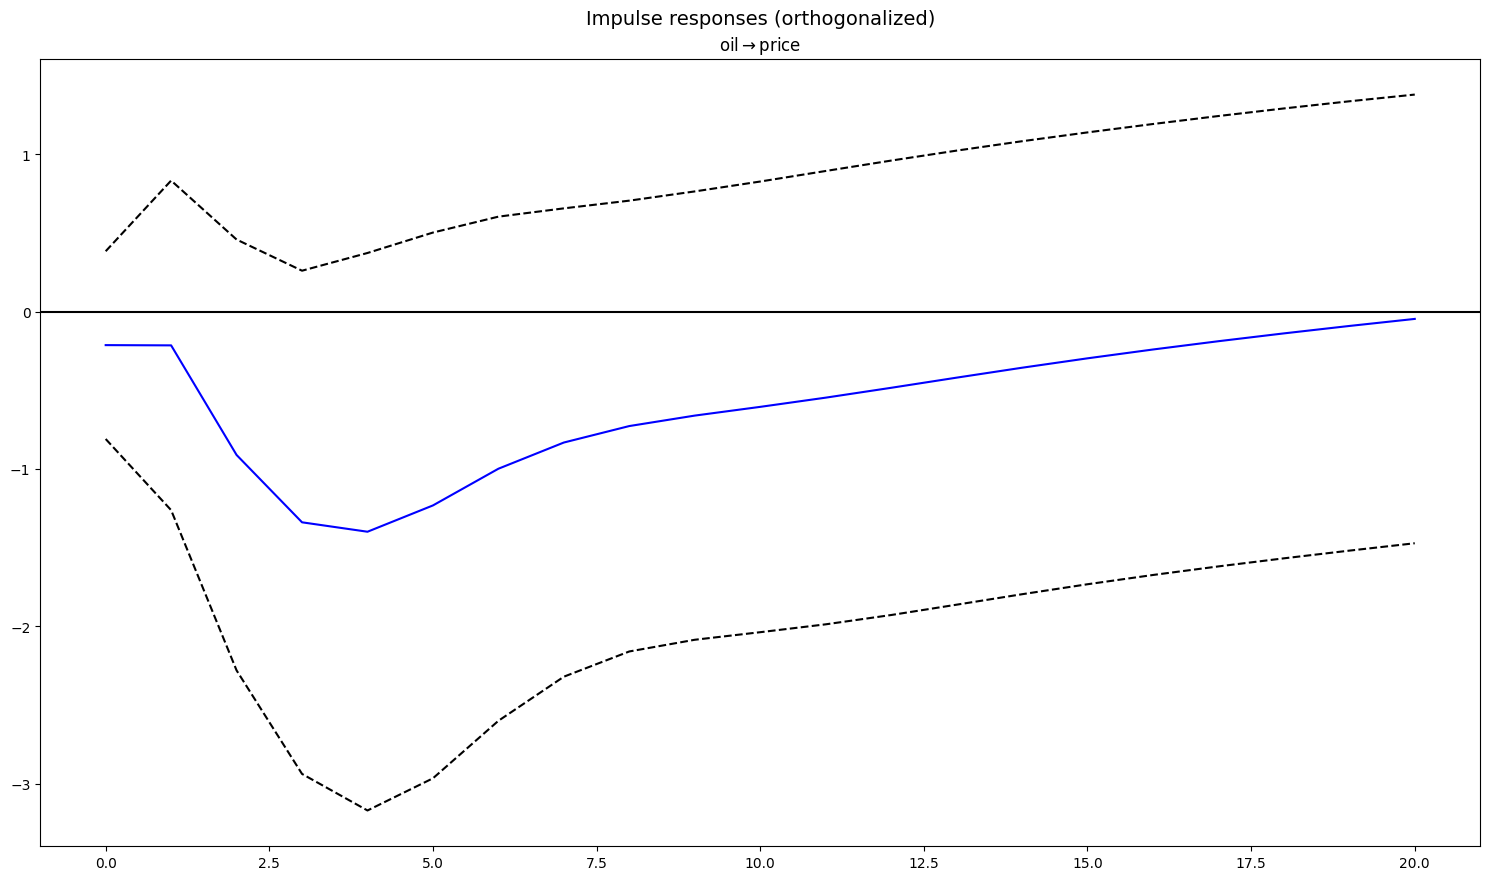

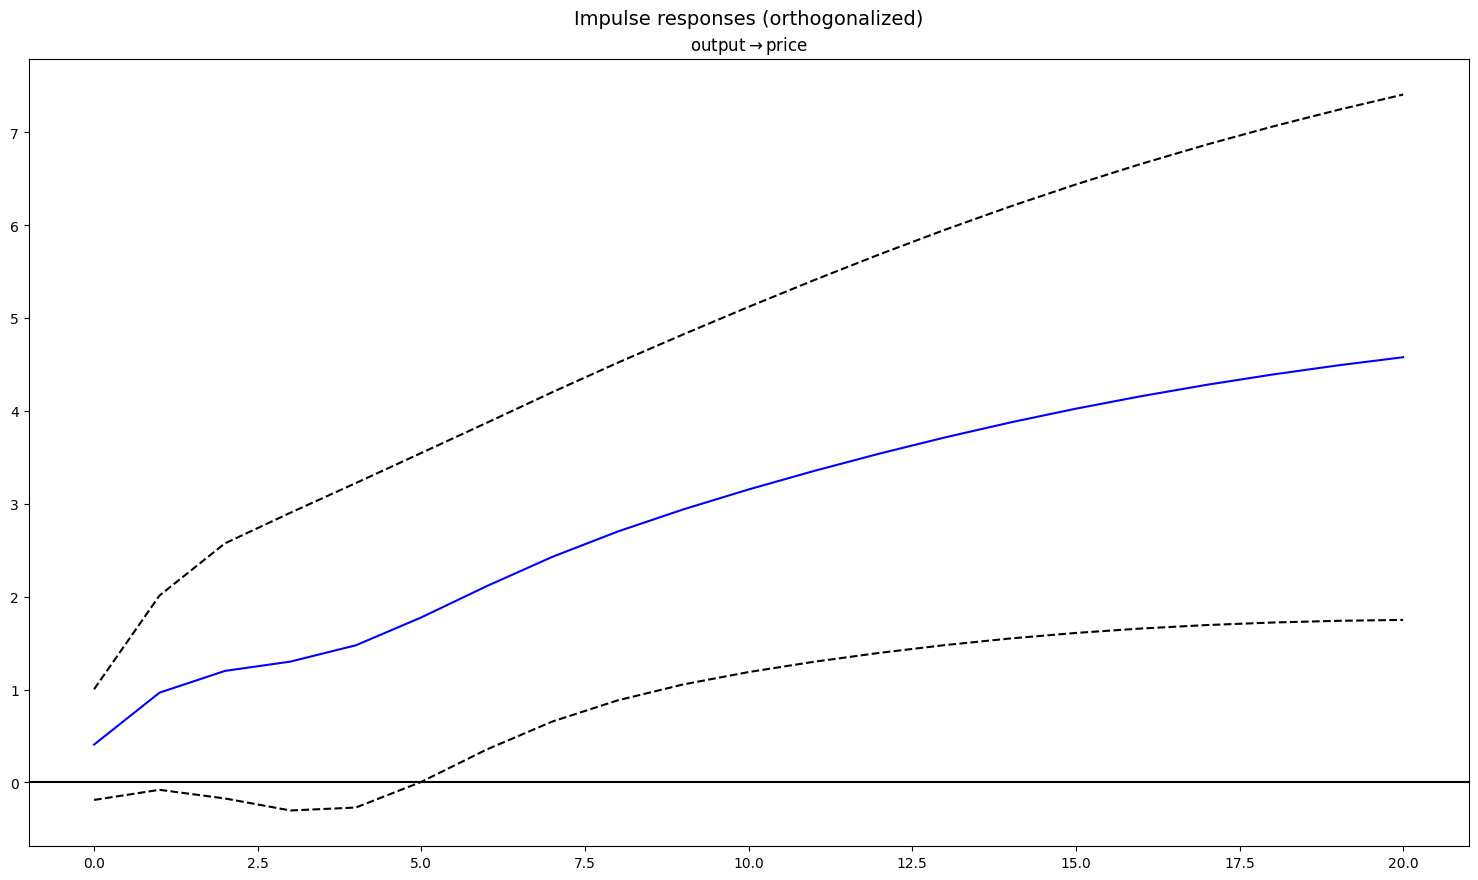

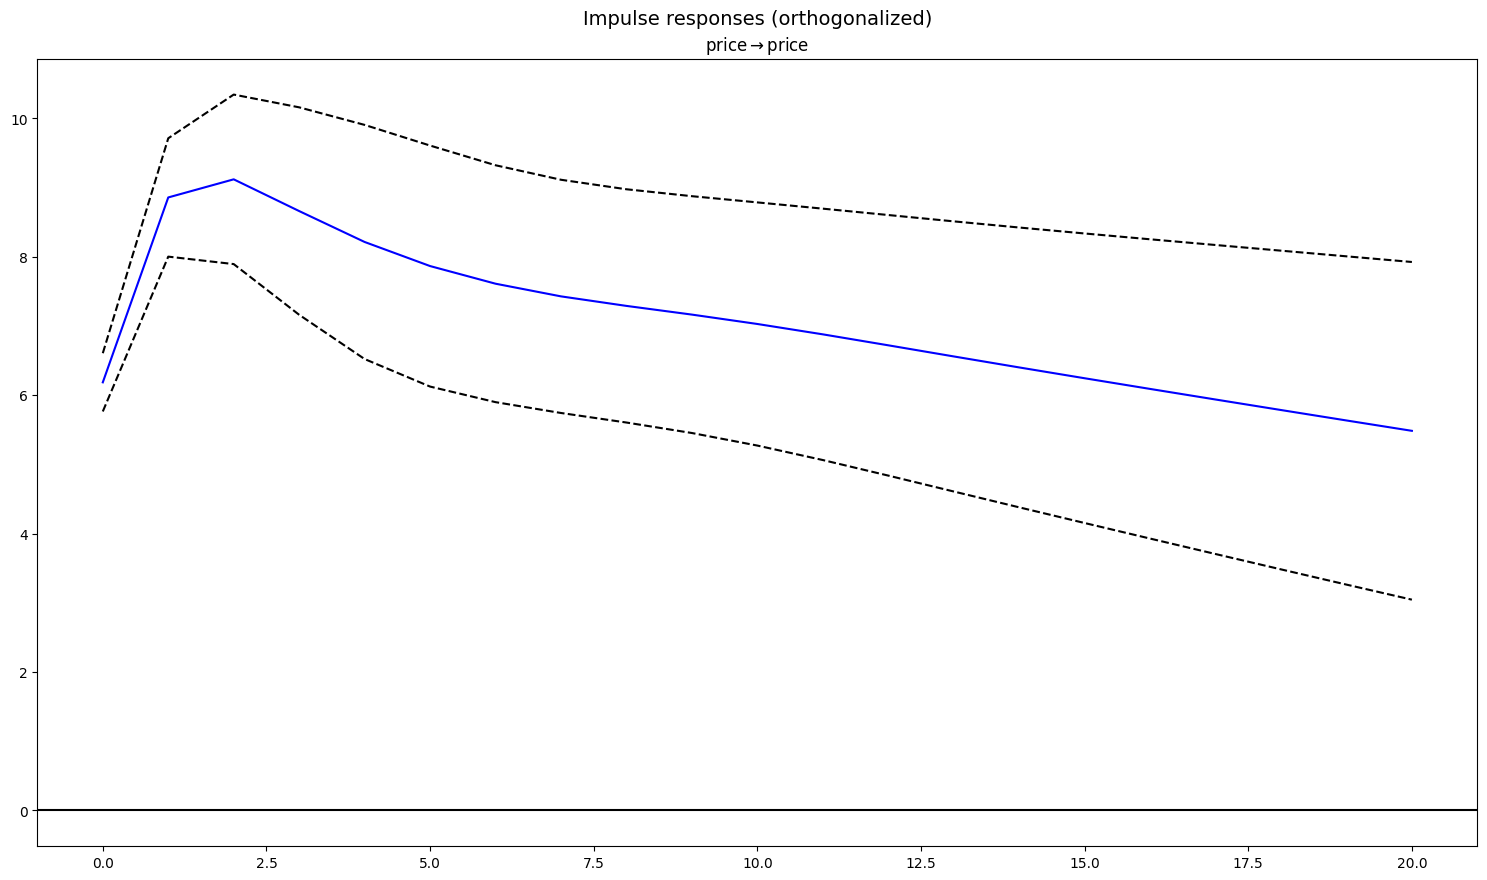

In [75]:
irf = var_result.irf(periods=20)
irf.plot(orth=True, impulse='oil', response='price', figsize=(16, 9));
irf.plot(orth=True, impulse='output', response='price', figsize=(16, 9));
irf.plot(orth=True, impulse='price', response='price', figsize=(16, 9));

In [ ]:
# 指定されたインパルスとレスポンスのIRF値を抽出
irf_values = irf.orth_irfs

# IRF値を格納するDataFrameを作成
irf_df = pd.DataFrame({
    'Period': np.arange(irf_values.shape[0]),
    'Oil': irf_values[:, 2, 0],
    'Output': irf_values[:, 2, 1],
    'Price': irf_values[:, 2, 2]
})

# IRFテーブルを表示
print(irf_df)

    Period       Oil    Output     Price
0        0 -0.212846  0.407350  6.186537
1        1 -0.214431  0.966817  8.858133
2        2 -0.911040  1.201153  9.119892
3        3 -1.339037  1.301306  8.661399
4        4 -1.398904  1.477037  8.214738
5        5 -1.231695  1.777396  7.866685
6        6 -0.998465  2.114406  7.611826
7        7 -0.831919  2.429053  7.428718
8        8 -0.727225  2.702119  7.291055
9        9 -0.660757  2.940137  7.165367
10      10 -0.605259  3.155278  7.029734
11      11 -0.546785  3.354717  6.880054
12      12 -0.484147  3.541495  6.721574
13      13 -0.419620  3.715846  6.560972
14      14 -0.356562  3.877232  6.402027
15      15 -0.296777  4.025326  6.245651
16      16 -0.240702  4.160248  6.091362
17      17 -0.188049  4.282494  5.938454
18      18 -0.138307  4.392707  5.786550
19      19 -0.091109  4.491525  5.635623
20      20 -0.046264  4.579513  5.485844
